In [1]:
import pandas as pd
import numpy as np
import encodings
import datetime
#plotting and visualization library
import seaborn as sns
import scipy.stats as stats
#output plots in the notebook
%matplotlib inline

In [2]:
#Questions:
#Books read per year
#How many new books I added per month
#Number of read books per week

#How many books I have read per author
#The book I took longer to read (it is in my tbr from forever) and the book I took shorter to read


In [3]:
#I choose a encoding present in the file
aliases_values = set(encodings.aliases.aliases.values())
for encoding in set(encodings.aliases.aliases.values()):
    try:
        df = pd.read_csv(r"goodreads_library.csv", nrows=10,
                         encoding=encoding)
        # print("successful", encoding)
    except:
        pass

In [4]:
#Read the csv and display the data
df_books = pd.read_csv(r"goodreads_library.csv",
                       encoding="ISO-8859-9", sep=',', engine="python")
df_books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,156976346,L'Immortale,Catherynne M. Valente,"Valente, Catherynne M.",NaN,"=""""","=""""",0,3.97,Fazi Editore,...,NaN,2023/08/19,to-read,to-read (#479),to-read,NaN,NaN,NaN,0,0
1,58690308,Book Lovers,Emily Henry,"Henry, Emily",NaN,"=""""","=""""",0,4.17,Berkley,...,NaN,2023/04/18,currently-reading,currently-reading (#4),currently-reading,NaN,NaN,NaN,1,0
2,66087070,Suddenly a Murder,Lauren MuÃ±oz,"MuÃ±oz, Lauren",NaN,"=""0593617533""","=""9780593617533""",0,3.96,G.P. Putnam's Sons Books for Young Readers,...,NaN,2023/08/19,to-read,to-read (#478),to-read,NaN,NaN,NaN,0,0
3,157062582,"The Mystery Guest (Molly the Maid, #2)",Nita Prose,"Prose, Nita",NaN,"=""0593356187""","=""9780593356180""",0,4.11,Ballantine Books,...,NaN,2023/08/19,to-read,to-read (#477),to-read,NaN,NaN,NaN,0,0
4,75293475,"The Last Devil to Die (Thursday Murder Club, #4)",Richard Osman,"Osman, Richard",NaN,"=""0593299426""","=""9780593299425""",0,4.50,Pamela Dorman Books,...,NaN,2023/08/19,to-read,to-read (#476),to-read,NaN,NaN,NaN,0,0


In [5]:
#CHECK IF THE MAIN COLUMN HAVE NULL VALUES

In [6]:
#Main column: books' titles
if(df_books['Title'].isnull().sum()==0):
    print('All the titles are present')
else:
    print('Not all the titles are present')

All the titles are present


In [7]:
#Main column: books' authors
if(df_books['Author'].isnull().sum()==0):
    print('All the authors are present')
else:
    print('Not all the authors are present')

All the authors are present


In [8]:
#Main column: books' average ratings
if(df_books['Average Rating'].isnull().sum()==0):
    print('All the books have a rate')
else:
    print('Not all the books have a rate')

All the books have a rate


In [9]:
#Main column: books' ID
if(df_books['Book Id'].isnull().sum()==0):
    print('All the books have a ID')
else:
    print('Not all the books have a ID')

All the books have a ID


In [10]:
#DROP NOT USEFUL COLUMNS
to_drop = ['ISBN13', 'Binding', 'Spoiler', 'Private Notes', 'Owned Copies', 'Bookshelves', 'Bookshelves with positions', 'ISBN']
df_books.drop(to_drop, inplace=True, axis=1)
print("I drop the following columns because not usefull for the analysis:")
for i in range(len(to_drop)):
    print(to_drop[i])

I drop the following columns because not usefull for the analysis:
ISBN13
Binding
Spoiler
Private Notes
Owned Copies
Bookshelves
Bookshelves with positions
ISBN


In [11]:
df_books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,My Review,Read Count
0,156976346,L'Immortale,Catherynne M. Valente,"Valente, Catherynne M.",NaN,0,3.97,Fazi Editore,346.0,2023.0,2011.0,NaN,2023/08/19,to-read,NaN,0
1,58690308,Book Lovers,Emily Henry,"Henry, Emily",NaN,0,4.17,Berkley,377.0,2022.0,2022.0,NaN,2023/04/18,currently-reading,NaN,1
2,66087070,Suddenly a Murder,Lauren MuÃ±oz,"MuÃ±oz, Lauren",NaN,0,3.96,G.P. Putnam's Sons Books for Young Readers,320.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
3,157062582,"The Mystery Guest (Molly the Maid, #2)",Nita Prose,"Prose, Nita",NaN,0,4.11,Ballantine Books,304.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
4,75293475,"The Last Devil to Die (Thursday Murder Club, #4)",Richard Osman,"Osman, Richard",NaN,0,4.50,Pamela Dorman Books,368.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0


In [12]:
#"Additional Author" is a valuable column?
if(df_books['Additional Authors'].isnull().sum()==843):
    print('No additiona Authors')
else:
    #How many "Additional Authors we have
    add_auth = len(df_books) - df_books['Additional Authors'].isnull().sum()
    print(add_auth, "additional authors are present in <Additional Author> column" )

241 additional authors are present in <Additional Author> column


In [13]:
#Check the additional authors
df_books.loc[df_books['Additional Authors'].notna()]

,Book Id,Title,Author,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,My Review,Read Count
27,3264497,Orgoglio e pregiudizio,Jane Austen,"Austen, Jane","Giulio Caprin, W. Somerset Maugham",4,4.28,Mondadori,390.0,2002.0,1813.0,2023/08/19,2023/08/15,read,"Nonostante abbia 210 anni, Orgoglio e Pregiudi...",1
30,28169059,"Intestino, secondo cervello: Le rivoluzionarie...",Miguel Ãngel AlmodÃ³var,"AlmodÃ³var, Miguel Ãngel",Nicola Jacchia,5,3.81,Vallardi,221.0,2015.0,2014.0,2021/09/04,2020/11/28,read-2021,NaN,1
32,58990922,Fiori di stagione,Emmanuelle Kecir-Lepetit,"Kecir-Lepetit, Emmanuelle","Lea Maupetit, Vera Verdiani",0,4.33,Ippocampo edizioni,96.0,2021.0,NaN,NaN,2023/07/04,to-read,NaN,0
33,58990941,Alberi di qui e d'altrove,Emmanuelle Kecir-Lepetit,"Kecir-Lepetit, Emmanuelle","Lea Maupetit, Vera Verdiani",0,4.50,Ippocampo edizioni,96.0,2021.0,NaN,NaN,2023/07/04,to-read,NaN,0
47,18795453,IO Sono Piccola?,Philipp Winterberg,"Winterberg, Philipp",Nadja Wichmann,4,4.17,CreateSpace Independent Publishing Platform,40.0,2013.0,NaN,2018/08/15,2018/08/14,read,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,10165178,La lega degli uomini spaventati,Rex Stout,"Stout, Rex",Alfredo Pitta,2,4.08,Arnoldo Mondadori,191.0,2004.0,1935.0,2018/08/15,2018/08/15,read,NaN,1
815,27408440,L'ottava moglie di mister G,Elizabeth Ferrars,"Ferrars, Elizabeth",Lina Rolli,2,3.14,Mondadori,170.0,1973.0,1991.0,2018/08/15,2018/08/15,read,NaN,1
817,25140407,Un lungo fatale ultimo addio,Raffaella V. Poggi,"Poggi, Raffaella V.",VeloNero,3,3.68,Newton Compton Editori,288.0,2015.0,2014.0,2018/08/15,2018/08/15,read,NaN,1
821,25538992,Una spola di filo blu,Anne Tyler,"Tyler, Anne",Laura Pignatti,3,3.43,Guanda,400.0,2015.0,2015.0,2018/08/15,2018/08/15,read,NaN,2


In [14]:
#Drop the "Author" column instead of "Author l-f": in "Author l-f" we have author define by last name (l) and first name (f)
if(df_books['Author l-f'].isnull().sum()==0):
    print('All the authors last name - first name are present')
    df_books.drop('Author', inplace=True, axis=1)
    print('I dropped the <Author> column')
else:
    print('Not all the authors last name - first name are present')

All the authors last name - first name are present
I dropped the <Author> column


In [15]:
df_books.head()

,Book Id,Title,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,My Review,Read Count
0,156976346,L'Immortale,"Valente, Catherynne M.",NaN,0,3.97,Fazi Editore,346.0,2023.0,2011.0,NaN,2023/08/19,to-read,NaN,0
1,58690308,Book Lovers,"Henry, Emily",NaN,0,4.17,Berkley,377.0,2022.0,2022.0,NaN,2023/04/18,currently-reading,NaN,1
2,66087070,Suddenly a Murder,"MuÃ±oz, Lauren",NaN,0,3.96,G.P. Putnam's Sons Books for Young Readers,320.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
3,157062582,"The Mystery Guest (Molly the Maid, #2)","Prose, Nita",NaN,0,4.11,Ballantine Books,304.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0
4,75293475,"The Last Devil to Die (Thursday Murder Club, #4)","Osman, Richard",NaN,0,4.50,Pamela Dorman Books,368.0,2023.0,2023.0,NaN,2023/08/19,to-read,NaN,0


In [16]:
#Display info about df to check the data types
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Book Id                    843 non-null    int64  
 1   Title                      843 non-null    object 
 2   Author l-f                 843 non-null    object 
 3   Additional Authors         241 non-null    object 
 4   My Rating                  843 non-null    int64  
 5   Average Rating             843 non-null    float64
 6   Publisher                  831 non-null    object 
 7   Number of Pages            828 non-null    float64
 8   Year Published             841 non-null    float64
 9   Original Publication Year  752 non-null    float64
 10  Date Read                  230 non-null    object 
 11  Date Added                 843 non-null    object 
 12  Exclusive Shelf            843 non-null    object 
 13  My Review                  28 non-null     object 

In [17]:
#I am going to change float64 type for columns "Number of Pages" (int64), "Year published" (int64) and "Original Publication Year" (int64)
# NUMBER OF PAGES
print("Number of pages_ CLEANING")
#First, we can see that the columns has null values
nan_pages = df_books["Number of Pages"].isnull().sum()
print("Before the cleaning: Number of samples without a value: ", nan_pages)
#15 values are null
#I show the rows to see the data
df_books.loc[df_books["Number of Pages"].isnull()]
#I didn't find the number of pages of two rows, so I decided to add the mean number of pages.
mean_pages = int(df_books["Number of Pages"].mean())
#I replace the NaN values with the mean fo the column
df_books["Number of Pages"].fillna(mean_pages, inplace=True)
nan_pages_after = df_books["Number of Pages"].isnull().sum()
print("After the cleaning: Number of samples without a value: ", nan_pages_after)
df_books["Number of Pages"] = df_books["Number of Pages"].astype("int64", copy=False)

Number of pages_ CLEANING
Before the cleaning: Number of samples without a value:  15
After the cleaning: Number of samples without a value:  0


In [18]:
#YEAR PUBLISHED AND ORIGINAL PUBLICATION YEAR
# being year only, we treat them like a int
df_books.loc[df_books["Year Published"].isnull()]
#Only two: I add the right year of publishing
df_books.loc[290, "Year Published"] = 2009
df_books.loc[740, "Year Published"] = 1985
#I can't know easyly what the original publication year is for these books, so I put the value to 0
df_books["Original Publication Year"].fillna(0, inplace=True)
nan_pub_year_after = df_books["Original Publication Year"].isnull().sum()
#Print
print("YEAR PUBLISHED - After the cleaning: Number of samples without a value: ", nan_pub_year_after)
nan_real_pub_year_after = df_books["Original Publication Year"].isnull().sum()
print("ORIGINAL PUBLICATION YEAR - After the cleaning: Number of samples without a value: ", nan_real_pub_year_after)

YEAR PUBLISHED - After the cleaning: Number of samples without a value:  0
ORIGINAL PUBLICATION YEAR - After the cleaning: Number of samples without a value:  0


In [19]:
#We change the type of the columns FLOAT --> INT
df_books["Year Published"] = df_books["Year Published"].astype("int64", copy=False)
df_books["Original Publication Year"] = df_books["Original Publication Year"].astype("int64", copy=False)
df_books["My Rating"] = df_books["My Rating"].astype("int64", copy=False)
df_books["My Rating"].fillna(0, inplace=True)

In [20]:
#We have to change float64 type for columns "Date Read" (date), "Date Added" (date)
# DATE ADDED has not null values
df_books['Date Added'] = pd.to_datetime(df_books['Date Added'])

In [21]:
#Check the date validity
x = datetime.datetime(2017, 1, 1)
if(len(df_books.loc[df_books['Date Added'] < x]) == 0):
    print("All the values are ok")
else:
    print("Some values have a wrong date")

All the values are ok


In [22]:
#Change data type for "Date Read" column
df_books["Date Read"] = pd.to_datetime(df_books["Date Read"])

In [23]:
#Check if some book signed as "read" hasn't a value in "Date Read" column
if(len(df_books.loc[(df_books["Date Read"].isnull()) & (df_books['Exclusive Shelf'] == 'read')])>0):
    print("There are", len(df_books.loc[(df_books["Date Read"].isnull()) & (df_books['Exclusive Shelf'] == 'read')]), "books read but without a read date")
    x1 = datetime.datetime(2018,6,18)
    print(len(df_books.loc[(df_books["Date Read"].isnull()) & (df_books['Exclusive Shelf'] == 'read') & (df_books['Date Added'] <= x1)]), "of them were added in the first access on goodreads (18/6/2018)")
else:
    print("All the read books have a read date")    

There are 127 books read but without a read date
12 of them were added in the first access on goodreads (18/6/2018)


In [24]:
#I am going to change object type in string type for columns "Title", "Author l-f", "Additional Authors", "Publisher", "Exclusive Shelf", "My Review"
df_books["Title"] = df_books["Title"].astype("string")
df_books["Author l-f"] = df_books["Author l-f"].astype("string")
df_books["Additional Authors"] = df_books["Additional Authors"].astype("string")
df_books["Publisher"] = df_books["Publisher"].astype("string")
df_books["Exclusive Shelf"] = df_books["Exclusive Shelf"].astype("string")
df_books["My Review"] = df_books["My Review"].astype("string")

In [25]:
#Missing data column "Additional Authors"
df_books["Additional Authors"] = df_books["Additional Authors"].fillna("No additional authors")

In [26]:
#Missing data column "Publisher"
df_books.loc[df_books["Publisher"].isnull()]
#Add missing data
df_books.loc[40, "Publisher"] = "Union Square & Co."
df_books.loc[51, "Publisher"] = "Fabbri"
df_books.loc[226, "Publisher"] = "Orion"
df_books.loc[290, "Publisher"] = "Conrad Octopus"
df_books.loc[347, "Publisher"] = "VIZ Media: SHONEN JUMP"
df_books.loc[614, "Publisher"] = "Vallardi"
df_books["Publisher"] = df_books["Publisher"].fillna("No publisher")
#Missing data column "My Review"
df_books["My Review"] = df_books["My Review"].fillna("No review available")

In [27]:
#Final check
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Book Id                    843 non-null    int64         
 1   Title                      843 non-null    string        
 2   Author l-f                 843 non-null    string        
 3   Additional Authors         843 non-null    string        
 4   My Rating                  843 non-null    int64         
 5   Average Rating             843 non-null    float64       
 6   Publisher                  843 non-null    string        
 7   Number of Pages            843 non-null    int64         
 8   Year Published             843 non-null    int64         
 9   Original Publication Year  843 non-null    int64         
 10  Date Read                  230 non-null    datetime64[ns]
 11  Date Added                 843 non-null    datetime64[ns]
 12  Exclusiv

In [28]:
# QUESTION n.1: How many books I have read from 2019? (from the first year I effectivly used the app)

list_of_books_read_from_2019 = df_books.loc[df_books["Date Read"]>datetime.datetime(2018,12,31)]

books_read_from_2019 = df_books.where(df_books["Date Read"]>datetime.datetime(2018, 12, 31))["Date Read"].count()
print("From 2019 I read:", books_read_from_2019, "books")

From 2019 I read: 192 books


In [29]:
#QUESTION n.2: What is the longest book I have read from 2019? And the shorter?

index_longest = list_of_books_read_from_2019["Number of Pages"].idxmax()
longest_book = df_books.iloc[index_longest]
print("The longest book I have read from 2019 is ", longest_book["Title"] , "- Number of pages:", longest_book["Number of Pages"])
index_shortest = list_of_books_read_from_2019["Number of Pages"].idxmin()
shortest_book = df_books.iloc[index_shortest]
print("The shortest book I have read from 2019 is ", shortest_book["Title"] , "- Number of pages:", shortest_book["Number of Pages"])

The longest book I have read from 2019 is  Capire, fare e reinventare il fumetto (#1-3) - Number of pages: 752
The shortest book I have read from 2019 is  Il cammino dell'arco - Number of pages: 31


In [30]:
#Question n.3: Who is the author whose books you have read the most?

the_most_frequent_author_read = list_of_books_read_from_2019["Author l-f"].mode()
for i in the_most_frequent_author_read:
    print("Author:", i)
    print(list_of_books_read_from_2019.loc[list_of_books_read_from_2019["Author l-f"] == i]["Title"])


Author: Morishita, Suu
467    ãã³ããã¨æã 4 [Yubisaki to Renren 4]
483                       A Sign of Affection, Vol. 1
484                       A Sign of Affection, Vol. 2
485    ãã³ããã¨æã 3 [Yubisaki to Renren 3]
Name: Title, dtype: string
Author: Oseman, Alice
622      Heartstopper: Volume One (Heartstopper, #1)
623      Heartstopper: Volume Two (Heartstopper, #2)
624     Heartstopper: Volume Four (Heartstopper, #4)
625    Heartstopper: Volume Three (Heartstopper, #3)
Name: Title, dtype: string
Author: Sadamoto, Yoshiyuki
325    Neon Genesis Evangelion. Collector's Edition. ...
326    Neon Genesis Evangelion. Collector's Edition. ...
359    Neon Genesis Evangelion. Collector's Edition. ...
389    Neon Genesis Evangelion. Collector's Edition. ...
Name: Title, dtype: string


In [31]:
#Question n.4: Who is the publisher whose books you have read the most?

the_most_frequent_author_read = list_of_books_read_from_2019["Publisher"].mode()
for i in the_most_frequent_author_read:
    print("Author:", i)
    print(list_of_books_read_from_2019.loc[list_of_books_read_from_2019["Publisher"] == i]["Title"])

Author: Longanesi
589                                      Ninfa dormiente
603                                Fiori sopra l'inferno
619               Luce della notte (Teresa Battaglia #3)
630                           L'ombrello dell'imperatore
648               I grandi classici riveduti e scorretti
658    La natura geniale: Come e perchÃ© le piante ca...
725                                    Errore di sistema
730    I bottoni di Napoleone: Come 17 molecole hanno...
Name: Title, dtype: string


In [32]:
#QUESTION n.5: The book that waited the least to be read
difference_date = list_of_books_read_from_2019["Date Read"] - list_of_books_read_from_2019["Date Added"]
print("The book that wainter the least to be read is:", df_books.iloc[difference_date.idxmin()]["Title"])

The book that wainter the least to be read is: Heartstopper: Volume Two (Heartstopper, #2)


In [33]:
#QUESTION n.6: The book that waited the most to be read
difference_date = list_of_books_read_from_2019["Date Read"] - list_of_books_read_from_2019["Date Added"]
print("The book that wainter the most to be read is:", df_books.iloc[difference_date.idxmax()]["Title"])

The book that wainter the most to be read is: If I Had Your Face


In [34]:
#QUESTION n.7: Who is the author whose books you want to read the most in the future?
future_books = df_books.loc[df_books["Exclusive Shelf"]== "to-read"]

the_most_frequent_author_toRead = future_books["Author l-f"].mode()
for i in the_most_frequent_author_toRead:
    print("Author:", i)
    print(future_books.loc[future_books["Author l-f"] == i]["Title"])


Author: Beaton, M.C.
363              Pushing up Daisies (Agatha Raisin, #27)
364                     Hot to Trot (Agatha Raisin, #31)
365                   Hiss and Hers (Agatha Raisin, #23)
366                Dishing the Dirt (Agatha Raisin, #26)
367               Devilâs Delight (Agatha Raisin, #33)
368                    Natale addio! (Agatha Raisin #18)
369    Agatha Raisin and the Witch of Wyckhadden (Aga...
370                  The Vicious Vet (Agatha Raisin, #2)
371              The Quiche of Death (Agatha Raisin, #1)
372    Agatha Raisin and the Fairies of Fryfam (Agath...
373                                    Christmas Crumble
374    Agatha Raisin and the Busy Body (Agatha Raisin...
375            Il maiale allo spiedo (Agatha Raisin #22)
376    Agatha Raisin e il Mago di Evesham (Agatha Rai...
377    Agatha Raisin e i giorni del diluvio (Agatha R...
Name: Title, dtype: string


In [35]:
#QUESTION n.8: what is the this year's books I rated 5 stars?
df_books.loc[(df_books["My Rating"] == 5) & (df_books["Date Read"]>datetime.datetime(2023, 1, 1))]

,Book Id,Title,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,My Review,Read Count
45,61402173,La mesmerista,"Simoni, Sara",No additional authors,5,4.11,Acheron Books,300,2022,0,2023-07-29,2023-07-18,read,Era da tanto che non leggevo un fantasy di una...,1
59,57937976,Il libro delle case straordinarie,"Yoshida, Seiji",No additional authors,5,4.65,L'ippocampo,128,2021,2020,2023-07-03,2023-07-03,read,TrentatrÃ© case illustrate con tratto dolce e ...,1
96,58784475,"Tomorrow, and Tomorrow, and Tomorrow","Zevin, Gabrielle",No additional authors,5,4.22,Knopf,401,2022,2022,2023-05-13,2022-11-16,read,No review available,1
325,123026999,Neon Genesis Evangelion. Collector's Edition. ...,"Sadamoto, Yoshiyuki",Khara,5,4.65,Panini Comics - Planet Manga,368,2023,2021,2023-04-19,2023-04-16,read,No review available,1
326,63893539,Neon Genesis Evangelion. Collector's Edition. ...,"Sadamoto, Yoshiyuki",Khara,5,4.69,Panini Comics - Planet Manga,368,2022,2021,2023-04-19,2023-04-16,read,No review available,1
392,67355110,Il tuo secondo cervello,"Forte, Tiago",Paolo Lucca,5,4.10,Sperling & Kupfer,261,2022,2022,2023-04-13,2022-11-16,read,DovrÃ² rileggere questo libro almeno tre o qua...,1
405,58665854,ã¢ãªã®ãã³ 2 [Ao no Hako 2],"Miura, Kouji",ä¸æµ¦ç³,5,4.08,ã¸ã£ã³ãã³ããã¯ã¹ (éè±ç¤¾),192,2021,2021,2023-04-10,2023-04-10,read,No review available,1
410,32998876,101 Essays That Will Change The Way You Think,"Wiest, Brianna",No additional authors,5,3.80,Thought Catalog Books,450,2016,2016,2023-03-22,2023-02-26,read,"Normalmente, quando un libro mi piace lo finis...",1
422,17909717,ãã¼ã«ã«ã¼ã ã¸ãããã 1 [Ballroom ...,"Takeuchi, Tomo",ç«¹å å,5,4.04,è¬è«ç¤¾ [KÅdansha],192,2012,2012,2023-03-01,2023-02-28,read-2023,Il ballo di sala non Ã¨ mai stato cosÃ¬ adrena...,1
423,57742489,ã¢ãªã®ãã³ 1 [Ao no Hako 1],"Miura, Kouji",ä¸æµ¦ç³,5,3.97,ã¸ã£ã³ãã³ããã¯ã¹ (éè±ç¤¾),192,2021,2021,2023-03-01,2023-03-01,read-2023,"Manga sportivo fresco, positivo e ben disegnat...",1


{2019: 51, 2020: 41, 2021: 39, 2022: 18, 2023: 43}
Books read per year:


[Text(0.5, 1.0, 'Books read per year')]

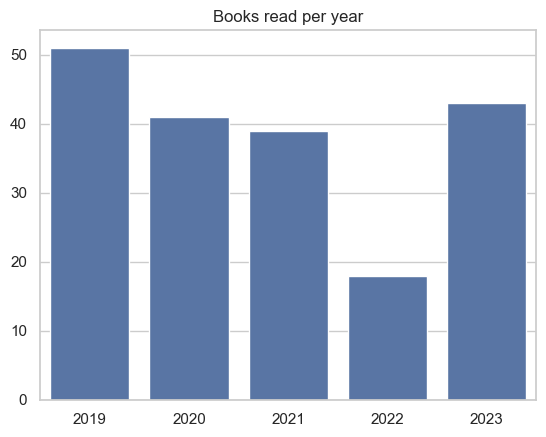

In [36]:
#I can divided them in year (from 2019 to 2023) and plot the results
#I create three functions
#The first and the second are the filters for the count (in the third funciton).
#filter_notafter use variable year (an integer) and the output is a series of boolean values

def filter_notafter(year, column):
    return df_books[column]<datetime.datetime(year,1,1)
def filter_notbefore(year, column):
    return df_books[column]>=datetime.datetime(year,1,1)
def books_count_in(year, column):
    return df_books.where(filter_notafter(year+1, column) & filter_notbefore(year, column))[column].count()
    
books_read_func = {}
start = 2019
end = 2023
for i in range(start, end+1):
    books_read_func[i] = books_count_in(i, "Date Read")

print(books_read_func)
#PLOT DATA
print("Books read per year:")
sns.set_theme(style="whitegrid")
sns.barplot(books_read_func, x=books_read_func.keys(), y=books_read_func.values()).set(title='Books read per year')

{2019: 91, 2020: 89, 2021: 46, 2022: 109, 2023: 432}
Books added per year:


[Text(0.5, 1.0, 'Books added on Goodreads per year')]

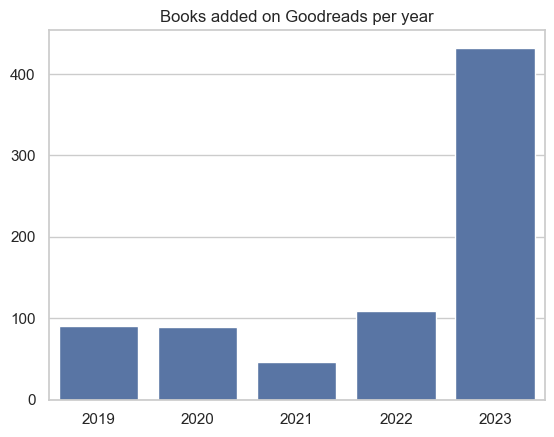

In [37]:
#PLOT DATA: NUMBER OF BOOKS ADDED ON GOODREADS PER YEAR
books_added_func = {}
for i in range(start, end+1):
    books_added_func[i] = books_count_in(i, "Date Added")
print(books_added_func)
#PLOT DATA
print("Books added per year:")
sns.set_theme(style="whitegrid")
sns.barplot(books_added_func, x=books_added_func.keys(), y=books_added_func.values()).set(title='Books added on Goodreads per year')

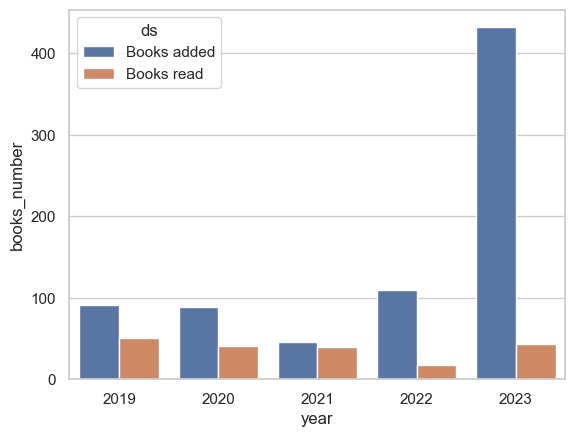

In [38]:
#Show the two dataset in only one plot
data_read ={'year': [2019, 2020, 2021, 2022, 2023], 'books_number' : [51, 41, 39, 18, 43]}
data_added = {'year': [2019, 2020, 2021, 2022, 2023], 'books_number' : [91, 89, 46, 109, 432]}
df_read = pd.DataFrame(data=data_read)
df_added = pd.DataFrame(data=data_added)
df_added['ds'] = "Books added"
df_read['ds'] = "Books read"
dss = pd.concat([df_added, df_read])
sns.barplot(x="year", y="books_number", hue="ds", data=dss)
keys_dict = []
values_dict = []
data_r ={'year': [keys_dict], 'books_number' : [values_dict]}
df_r = pd.DataFrame(data=data_r)

0.325861580399858


<Axes: >

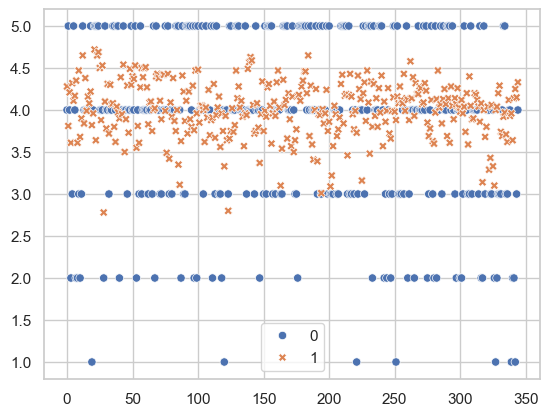

In [39]:
#QUESTION n.10: Is there a correaltion between myh ratings and average ratings?
#Extract my review
array_myRatings = df_books["My Rating"].values
array_averageRatings = df_books.where(df_books["My Rating"]>0)["Average Rating"].values
myRatings = np.empty(df_books.where(df_books["My Rating"]>0)["Average Rating"].count())
averageRatings = np.empty(df_books.where(df_books["My Rating"]>0)["Average Rating"].count())
index = 0
array_loop_index = 0
for i in array_myRatings:
    if(i != 0):
        myRatings[index] = i
        averageRatings[index] = array_averageRatings[array_loop_index]
        index = index + 1
    array_loop_index = array_loop_index + 1

corr, _ = stats.pearsonr (myRatings, averageRatings)
print(corr)

data_array_ratings = [myRatings, averageRatings]

sns.scatterplot(data_array_ratings)

In [40]:
#QUESTION n.9: My Average rating
averageRating_BooksRead = myRatings.mean()
averageRating_BooksRead

3.8434782608695652

In [41]:
#Average Ratings from all the community's ratings
averageRating_averageRatings = averageRatings.mean()
averageRating_averageRatings

4.002

In [42]:
#So the difference from the means is not large. Without a strong correlation
# this means that we have very similar ratings and a lot of different ratings
# (where I rate a book with a very high score and the average is much lower and viceversa)
#We can see what is the standard deviation between our value. The gold standard is the community's averageRating value
print(np.std(data_array_ratings))

#We can measure the larger distance bertween two ratings (obviously for the same book)
diff = 0
for i in range(9, myRatings.size):
    if((myRatings[i] - averageRatings[i])>diff):
        diff = myRatings[i] - averageRatings[i]
        myValue = myRatings[i]
        communityValue = averageRatings[i]
print(diff)
print(myValue)
print(communityValue)
df_books.loc[(df_books["My Rating"]== myValue) & (df_books["Average Rating"] == communityValue)]["Title"]
df_books.iloc[567]

0.7631172940058678
1.65
5.0
3.35


Book Id                                                               26837384
Title                                                                  Origins
Author l-f                                                Kreines, Kimberly J.
Additional Authors           Ari Levitch, Kelly Digges, James Wyatt, Doug B...
My Rating                                                                    5
Average Rating                                                            3.35
Publisher                                                 Wizards of the Coast
Number of Pages                                                            349
Year Published                                                            2015
Original Publication Year                                                 2015
Date Read                                                  2019-04-21 00:00:00
Date Added                                                 2019-03-24 00:00:00
Exclusive Shelf                                     

<Axes: >

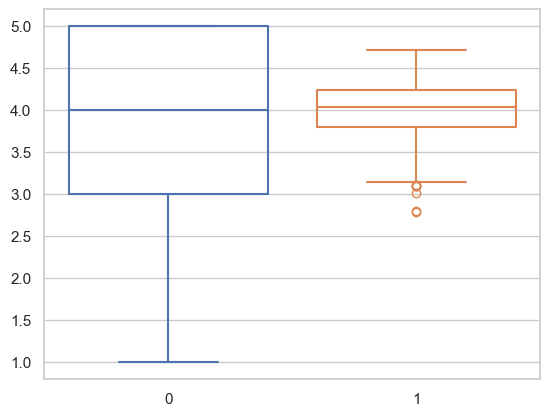

In [43]:
#Box Plot of the two dataset
sns.boxplot(data_array_ratings, fill=False)